![example](images/director_shot.jpeg)

# Microsoft Box Office

**Author:** Matthew Gayanelo
***

## Overview

Due to the success of original content creation in various streaming platforms, Microsoft will be launching an in house movie studio. In order to optimize this venture, Microsoft has tasked us with conducting a data study that will produce actionable insights and guide them on creating optimum content. 

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

There are several data sets available to preform insight analysis, and moreover several metrics that could define success. Fundamentally, this study will look to answer the following questions:

1. Which genres generated the highest amount of domestic revenue per movie?
2. Which genres had the highest measurable amount of engagement?
3. When an audience does engage, which genres garnered the most positive response?

In order to address these questions, the following will be used as succcess metrics:

1. Average Domestic Gross per Movie by Genre
2. Average Votes per Movie by Genre
3. Average Rating per Movie by Genre

A firm unerstanidng of these metrics will provide a holistic understanding of revenue generation, the measured emotional engagement of the audience, and how positive/negative nature of that audience engagement is.

## Data Understanding

In order to meet the time requirements, and achieve an optimal data study, the following data sets have been chosen to conduct our analytics:

1. **IMDB Titles / Genre Classificaitons**

    * **Source**: IMDB
    * **Analytical Prupose**: General Classification
    * **Target Variable**: 'tconst' (unique identifier) & 'genres'
    * **Target Variable Use**: 'tconst' will be used to match IMDB titles with IMDB Ratings in order to bucket the final dataset


2. **IMDB Ratings**

    * **Source**: IMDB
    * **Analytical Prupose**: Measure Engagement & Average Rating
    * **Target Variable**: 'tconst' (unique identifier), 'averagerating' & 'numvotes'
    * **Target Variable Use**: 'tconst' will be used to match IMDB titles with IMDB Ratings in order to bucket the final dataset, 'averagerating' will be used to measure positivity/negativity of engagement & 'numvotes' will be used to measure size of engagement
    

3. **Box Office Movie Gross**

    * **Source**: Box Office Mojo
    * **Analytical Prupose**: Measure Domestic Gross
    * **Target Variable**: 'title' & 'domestic gross'
    * **Target Variable Use**: 'title' will be used to merge this data set into the final data frame, while 'domestic gross' will be used to measure revenue generation on a per genre basis.

## Data Preparation: IMDB Titles / Genre Classificaitons (df_basics)

**Variables Dropped / Created**:
   
   'updated_original_title' was created to mitigate 21 NaN Values in 'original_title'. Values in the 'updated_original_title' were derived from the 'primary_title' when available or the 'original_title' if found to be NaN. This column would act as a placeholder for future merges in the event that 'original_title' would be required
    
**Missing/NaN Values Solutions**:
        
   5,408 rows were dropped due to the missing 'genres' data, since 'genres' were the main data point required from the set
        
   2,072 rows were dropped due to being 'studio', 'year', and 'primary_title' duplicates.
        
   31,739 NaN values were found in the 'runtime_minutes' column, but since this data point was not relevant to our core analytics these rows were left intact
          
**Justification**:

Data cleanup primarily focused on 'genres' and 'updated_primary_title' as the former would act as the main data point needed to bucket revenue, ratings, and votes in the IMDB ratings Data Set while the former would act as a potential unique identifier in future mergers. Dropping the selected rows was deemed permissable as this only comprised less than ~5% of the total database.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
#Creating Core Data Frames

df_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

In [3]:
#Quick snapshot of df_basics

df_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#Checking For NAs & Duplicates in df_basics

print(f'Total amount of NA Values per column:')
print(f' ')
print(df_basics.isna().sum())
print(" ")

df_basics_duplicated = df_basics.duplicated(subset = ['primary_title', 'start_year'])

print(f'Duplicated Title & Year Combinations = ', df_basics_duplicated.sum())
print(f'Original total line items = ', len(df_basics))



Total amount of NA Values per column:
 
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
 
Duplicated Title & Year Combinations =  2072
Original total line items =  146144


In [5]:
# Drop Duplicated Original Titles and Years & replace 'genre' NA with 'None'

df_basics = df_basics.drop_duplicates(subset=['primary_title', 'start_year'], keep = 'last')
df_basics['genres'] = df_basics['genres'].fillna('No Genre')

print(len(df_basics))
print(f' ')
print(f'Total amount of NA Values per column:')
print(f' ')
print(df_basics.isna().sum())

144072
 
Total amount of NA Values per column:
 
tconst                 0
primary_title          0
original_title        19
start_year             0
runtime_minutes    31337
genres                 0
dtype: int64


In [6]:
#Creating an updated_original_title columnn that replaced NaN values in original_title with the primary_title

df_basics['updated_orginal_title'] = np.where(df_basics['original_title'].isna(), df_basics['primary_title'], df_basics['original_title'])

df_basics[df_basics['original_title'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_orginal_title
39095,tt2397619,Woody Allen: A Documentary,NaN,2012,195.0,No Genre,Woody Allen: A Documentary
58624,tt3414266,The Outer Loop,NaN,2013,78.0,No Genre,The Outer Loop
62944,tt3616658,The Hangman,NaN,2017,NaN,No Genre,The Hangman
79274,tt4548042,Urban Legend: The Blind Side Strangler,NaN,2016,NaN,No Genre,Urban Legend: The Blind Side Strangler
80116,tt4599436,Please Don't Eat the Pansies,NaN,2016,NaN,No Genre,Please Don't Eat the Pansies
82058,tt4715728,Regen,NaN,2016,NaN,No Genre,Regen
82308,tt4732998,Limbo,NaN,2017,NaN,No Genre,Limbo
85353,tt4940426,OldZilla,NaN,2018,NaN,No Genre,OldZilla
107378,tt6288348,Deadly Affection,NaN,2017,NaN,No Genre,Deadly Affection
108971,tt6403090,What It Takes to Win,NaN,2017,NaN,No Genre,What It Takes to Win


## Data Preparation: IMDB Title Ratings (df_ratings)

**Variables Dropped / Created**:
   
   None
    
**Missing/NaN Values Solutions**:
        
   None
          
**Justification**:

   None

In [7]:
#Quick snapshot of df_ratings

df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
#Checking For NAs & Duplicates in df_ratings

print(f'Total amount of NA Values per column:')
print(f' ')
print(df_ratings.isna().sum())
print(" ")

df_ratings_duplicated = df_ratings.duplicated(subset = ['tconst'])

print(f'Duplicate values: ',df_ratings_duplicated.sum())

Total amount of NA Values per column:
 
tconst           0
averagerating    0
numvotes         0
dtype: int64
 
Duplicate values:  0


## Data Preparation: IMDB Title Ratings (df_gross)

**Variables Dropped / Created**:
   
   None
    
**Missing/NaN Values Solutions**:
        
   28 'domestic_gross' line items dropped due to NaN values
          
**Justification**:

   All other NaN values were retained as they would not influence the analytics moving forward

In [9]:
#Snapshot of df_gross

df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
#Checking For NaNs & Duplicates in df_gross

print(f'Total amount of NA Values per column:')
print(f' ')
print(df_gross.isna().sum())
print(" ")

df_gross_duplicated = df_gross.duplicated(subset = ['title', 'year', 'studio']) #Consider title year vs. title year studio

print(f'Duplicated Title, Year & Studio Combinations = ', df_gross_duplicated.sum())
print(f'Original total line items = ', len(df_gross))

Total amount of NA Values per column:
 
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
 
Duplicated Title, Year & Studio Combinations =  0
Original total line items =  3387


In [11]:
#Since domestic_gross NaN values represent a small percentage of the data, we will drop them

df_gross.dropna(subset= ['domestic_gross', ], inplace = True)

df_gross.isna().sum()

"{:,}".format(round(df_gross['domestic_gross'].mean(), 2))

'28,745,845.07'

In [12]:
df_gross[df_gross['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
1862,Plot for Peace,NaN,7100.0,NaN,2014


## Data Preparation: Joining df_basics and df_ratings  (df_titles_and_ratings)

**Variables Dropped / Created**:
   
   Genre Columns: Genre categories were isolated into seperate columns to determine their isolated revenue, engagement and ratings metrics.
   
   Weighted Score: Created to determine the weighted rating of each genre, basing the statistical weight of each movie by the votes garnered.
    
**Missing/NaN Values Solutions**:
        
   All relevant missing data/NaN line items solved for before merge

In [13]:
# Joining df_ratings and df_basiscs --> when I joined the dfs, I lost a few line items, why?

df_titles_and_ratings = pd.merge(df_ratings, df_basics, how = 'inner', on = 'tconst')

df_titles_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72557 entries, 0 to 72556
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tconst                 72557 non-null  object 
 1   averagerating          72557 non-null  float64
 2   numvotes               72557 non-null  int64  
 3   primary_title          72557 non-null  object 
 4   original_title         72557 non-null  object 
 5   start_year             72557 non-null  int64  
 6   runtime_minutes        65057 non-null  float64
 7   genres                 72557 non-null  object 
 8   updated_orginal_title  72557 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ MB


In [14]:
#Checking for duplicates in merged data frame

df_titles_and_ratings.duplicated(subset=['primary_title', 'start_year']).sum()

0

In [15]:
#Identifying all the unique Genres

unique_genres = []
for genres in df_titles_and_ratings['genres']:
    genre_list = genres.split(',')
    for genre in genre_list:
        unique_genres.append(genre)
    
unique_genres_list = set(unique_genres)

unique_genres_list

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'No Genre',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [16]:
#Adding genres as columns

for genre in unique_genres_list:
    df_titles_and_ratings[genre] = np.where(df_titles_and_ratings.genres.str.contains(genre), 1, 0)


In [17]:
#Sense checking new genre columns

df_titles_and_ratings[df_titles_and_ratings['Action'] == 1]

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,updated_orginal_title,Family,Crime,Drama,Comedy,Horror,Sci-Fi,Documentary,Thriller,Musical,Adventure,History,Biography,Fantasy,Mystery,Short,Game-Show,Adult,Music,No Genre,Western,Romance,News,Sport,Animation,Reality-TV,Action,War
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",The Vanquisher,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
20,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",21 Jump Street,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35,tt1294141,4.5,113,Dancing Ninja,Dancing Ninja,2010,98.0,"Action,Comedy,Crime",Dancing Ninja,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72524,tt9378850,3.8,114,Kung Fu Monster,Wu lin guai shou,2018,104.0,"Action,Fantasy",Wu lin guai shou,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
72525,tt9382596,4.1,293,The Car: Road to Revenge,The Car: Road to Revenge,2019,89.0,"Action,Horror,Thriller",The Car: Road to Revenge,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
72530,tt9526152,7.6,29,DanMachi: Is It Wrong to Try to Pick Up Girls ...,Gekijouban danjon ni deai o motomeru no wa mac...,2019,82.0,"Action,Adventure,Animation",Gekijouban danjon ni deai o motomeru no wa mac...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
72553,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",Code Geass: Lelouch of the Rebellion Episode III,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [18]:
#Create an Average Weighted Score

# df_titles_and_ratings['Average_Genre_Weighted_Score'] = df_titles_and_ratings['numvotes'] // df_titles_and_ratings[df_titles_and_ratings['Action']== 1].sum()['numvotes']

for genre in unique_genres_list:
    df_titles_and_ratings[genre + ' WS'] = np.where(df_titles_and_ratings[genre] == 1,
                                        df_titles_and_ratings['numvotes'] / 
                                        df_titles_and_ratings[df_titles_and_ratings[genre] == 1].sum()['numvotes'], 0) * df_titles_and_ratings['averagerating']


In [19]:
#WS Sense Check

df_titles_and_ratings[df_titles_and_ratings['Romance'] == 1].sum()['Romance WS']

6.66377620330602

## Data Preparation: Creating df_rev_and_ratings  (df_titles_and_ratings + df_gross)

**Variables Dropped / Created**:
   
   
   'unique id': A unique identifier created out of the 'primary_title' and the 'year for df_gross and made out of the 'title' and 'year' for df_titles_and_ratings. This identifier will be used to merge both dataframes. 
   
**Missing/NaN Values Solutions**:
        
   All relevant missing data/NaN line items solved for before merge

In [20]:
#Remove punctuation from df_titles_and_ratings and df_gross

import string

punc = string.punctuation

for i in punc:
    df_titles_and_ratings['primary_title'] = df_titles_and_ratings['primary_title'].apply(lambda x: x.replace(i, ""))

for i in punc:
    df_gross['title'] = df_gross['title'].apply(lambda x: x.replace(i, ""))


In [21]:
#Create 'unique id' to merge df_titles_and_ratings and df_gross

df_gross['unique id'] = df_gross['title'] + df_gross['year'].astype(str)

df_titles_and_ratings['unique id'] = df_titles_and_ratings['primary_title'] + df_titles_and_ratings['start_year'].astype(str)

df_titles_and_ratings.head()

df_rev_and_ratings = pd.merge(df_gross, df_titles_and_ratings, how = 'inner', on = 'unique id')

df_rev_and_ratings

,title,studio,domestic_gross,foreign_gross,year,unique id,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,updated_orginal_title,Family,Crime,Drama,Comedy,Horror,Sci-Fi,Documentary,Thriller,Musical,Adventure,History,Biography,Fantasy,Mystery,Short,Game-Show,Adult,Music,No Genre,Western,Romance,News,Sport,Animation,Reality-TV,Action,War,Family WS,Crime WS,Drama WS,Comedy WS,Horror WS,Sci-Fi WS,Documentary WS,Thriller WS,Musical WS,Adventure WS,History WS,Biography WS,Fantasy WS,Mystery WS,Short WS,Game-Show WS,Adult WS,Music WS,No Genre WS,Western WS,Romance WS,News WS,Sport WS,Animation WS,Reality-TV WS,Action WS,War WS
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 32010,tt0435761,8.3,682218,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Toy Story 3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.000000,0.077839,0.0,0.000000,0.0,0.0000,0.0,0.068224,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.379288,0.0,0.000000,0.0
1,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 12010,tt0926084,7.7,425530,Harry Potter and the Deathly Hallows Part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery",Harry Potter and the Deathly Hallows: Part 1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.039478,0.0,0.0,0.128492,0.135967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,Inception,WB,292600000.0,535700000,2010,Inception2010,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Inception,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,0.000000,0.0,0.379747,0.0,0.0000,0.0,0.195203,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.162001,0.0
3,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After2010,tt0892791,6.3,167532,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",Shrek Forever After,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.000000,0.014509,0.0,0.000000,0.0,0.0000,0.0,0.012717,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070698,0.0,0.000000,0.0
4,The Twilight Saga Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga Eclipse2010,tt1325004,5.0,211733,The Twilight Saga Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",The Twilight Saga: Eclipse,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.009124,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.012755,0.0,0.0,0.041516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,Helicopter Eela,Eros,72000.0,NaN,2018,Helicopter Eela2018,tt8427036,5.4,673,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Helicopter Eela,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000031,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1829,Girls vs Gangsters,WGUSA,37100.0,NaN,2018,Girls vs Gangsters2018,tt7870578,3.3,148,Girls vs Gangsters,Gui mi 2,2018,120.0,"Comedy,Drama",Gui mi 2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000004,0.000007,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1830,A Paris Education,KL,21600.0,NaN,2018,A Paris Education2018,tt6593240,6.3,371,A Paris Education,Mes provinciales,2018,137.0,Drama,Mes provinciales,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000020,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.000000,0

## Data Preparation: Creating the Final Aggregated Data Frame 

**Variables Dropped / Created**:
   
   
   * 'ADG per Movie' was created to determine the average Domestic Gross a movie in each genre would generate
   * 'Average Votes per Movie' was created to determine to total amount of engagement each movie genre recieved per movie
   * 'Total Movies' was created to help calculate the two metrics above
   * All NaN values in 'Domestic Gross' were dropped, due to this being the main data point
   * All 'No Genre' line items were dropped, as this was a nescessary unique classifier
   * 'News' was dropped as a genre type as only 1 movie in our data set was categroized under this genre
   
   
**Missing/NaN Values Solutions**:
        
   * All relevant missing data/NaN line items solved for before merge

In [22]:
#Creating Final Data Frame

genre_names = list(unique_genres_list)
genre_ws = []
genre_votes = []

genre_ws_names = []
for genre in genre_names:
    genre_ws_names.append(genre + " WS")

for genre in unique_genres_list:
    genre_votes.append(int(df_titles_and_ratings[df_titles_and_ratings[genre] == 1].sum()['numvotes']))

for ws in genre_ws_names:
    genre_ws.append(df_titles_and_ratings[df_titles_and_ratings[ws] > 0].sum()[ws])

domestic_gross = []

for genre in unique_genres_list:
    domestic_gross.append(int(df_rev_and_ratings[df_rev_and_ratings[genre] == 1].sum()['domestic_gross']))

final_df = pd.DataFrame(np.column_stack([genre_names, genre_ws, genre_votes, domestic_gross]), 
                               columns=['Genres', 'Weighted Score', 'Votes', 'Domestic Gross'])

final_df.sort_values('Weighted Score', ascending = False).head()

# Convert Weighted Score to Float and Round to 2 Decimal Points

final_df['Weighted Score'] = final_df['Weighted Score'].map (lambda x: round((float(x)), 2))

# Convert Votes into int type

final_df['Votes'] = final_df['Votes'].map(lambda x: int(x))

# Convert Domestic Gross into int type

final_df['Domestic Gross'] = final_df['Domestic Gross'].map(lambda x: int(x))

In [23]:
#Adding AVG Domestic Gross (Domestic Gross / Total Movies Made) and Average Votes per Movie

total_movies = []
for genre in unique_genres_list:
    
    total_movies.append(df_rev_and_ratings[df_rev_and_ratings[genre] == 1].sum()[genre])

final_df['Total Movies'] = total_movies

# Convert 'Total Movies' into int type

final_df['Total Movies'] = final_df['Total Movies'].map(lambda x: int(x))

final_df['ADG per Movie'] = (final_df['Domestic Gross'] // final_df['Total Movies'])

final_df['Average Votes per Movie'] = (final_df['Votes'] // final_df['Total Movies'])



In [24]:
#Dropping all 0 Domestic Gross Values

final_df = final_df.loc[final_df['Domestic Gross'] > 0]

In [25]:
#Dropping No Genre & News

final_df = final_df[final_df['Genres'] != 'No Genre']
final_df = final_df[final_df['Genres'] != 'News']


final_df

,Genres,Weighted Score,Votes,Domestic Gross,Total Movies,ADG per Movie,Average Votes per Movie
0,Family,6.75,8122032,4914445400,81,60672165.0,100272.0
1,Crime,6.87,38504001,8044572800,258,31180514.0,149240.0
2,Drama,7.07,116034992,22417474297,950,23597341.0,122142.0
3,Comedy,6.72,72745599,29377658095,656,44783015.0,110892.0
4,Horror,6.11,22727000,5109835100,140,36498822.0,162335.0
5,Sci-Fi,7.13,42663593,14567714999,110,132433772.0,387850.0
6,Documentary,7.29,4655907,607499998,103,5898058.0,45202.0
7,Thriller,6.78,46687896,11448560600,277,41330543.0,168548.0
8,Musical,7.10,1316149,344582700,11,31325700.0,119649.0
9,Adventure,7.06,82997791,41129487795,364,112993098.0,228015.0


## Data Modeling

Our analytics took a simple 4 step approach to adress our 3 core questions.

* Step 1: Determine the total land scape by first determining which Genre Type was used the most in our dataset
* Step 2: Determine the highest Average Domestic Revenue per Genre
* Step 3: Determine the highest Average Votes per Genre
* Step 4: Determine the highest Weighted Score per Genre
* Step 5: Determine the most balanced Genre Combinations in order to provide an adequate reccomendation to Microsoft

These steps were purposely put in place in order to isolate those Genres that not only scored the highest ratings, earned the most money and garnered the most engagement, but to also determine of these genre combinations could provide the best competitive entry point for a new film studio.

Initial analysis, without using a weighted average on scoring, or a per capita metric on votes and revenue would have yielded analytics that would have skewed our reccomendations towards those segments that had the most movies made. As such, niche metrics had to be created to balance our analytics and provide an optimum reccomendation.


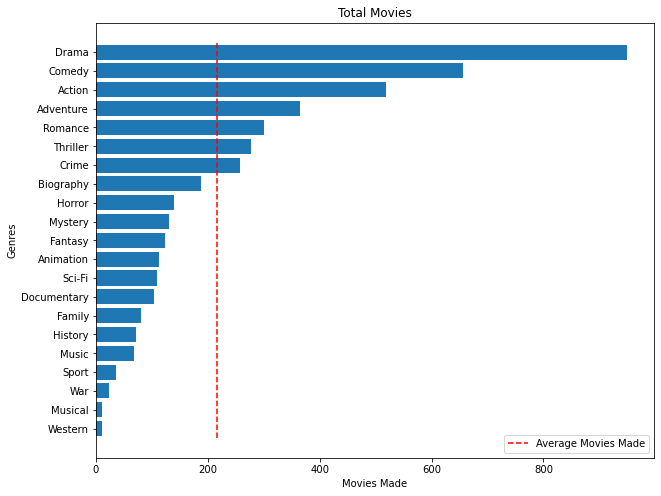

In [44]:
#STEP 1:

final_df = final_df.sort_values('Total Movies', ascending = True)

avg_total_movies = np.mean(final_df['Total Movies'])

plt.figure(figsize=(10, 8))

plt.barh(final_df['Genres'], final_df['Total Movies'])

# plotting a line to show the average genre popularity
plt.vlines(x=avg_total_movies, ymin=-0.5, ymax=20.5, color='red',
           linestyles='dashed', label='Average Movies Made')
plt.legend()

plt.title('Total Movies')
plt.xlabel('Movies Made')
plt.ylabel('Genres')

plt.show()



In [37]:
final_df.sort_values('ADG per Movie', ascending = True)

,Genres,Weighted Score,Votes,Domestic Gross,Total Movies,ADG per Movie,Average Votes per Movie
6,Documentary,7.29,4655907,607499998,103,5898058.0,45202.0
26,War,7.08,2643994,200781100,23,8729613.0,114956.0
20,Romance,6.66,25908372,5824994700,300,19416649.0,86361.0
2,Drama,7.07,116034992,22417474297,950,23597341.0,122142.0
10,History,7.39,7615733,1873181799,72,26016413.0,105774.0
17,Music,7.14,6573015,1823313200,68,26813429.0,96661.0
11,Biography,7.48,21404084,5192693999,187,27768417.0,114460.0
22,Sport,7.31,3648102,999294000,35,28551257.0,104231.0
1,Crime,6.87,38504001,8044572800,258,31180514.0,149240.0
8,Musical,7.10,1316149,344582700,11,31325700.0,119649.0


Text(0, 0.5, 'Genres')

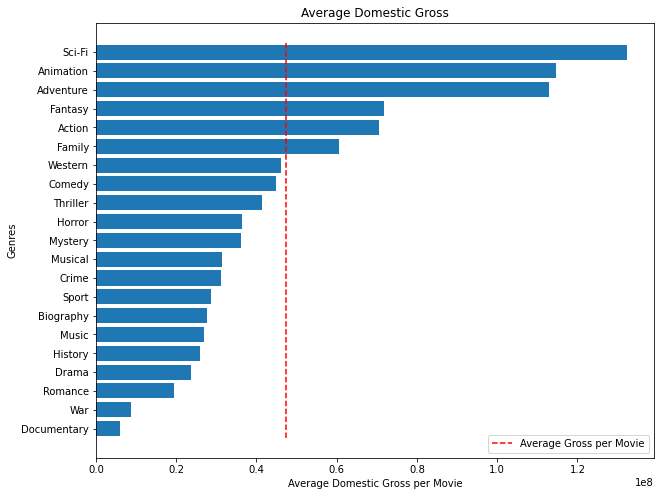

In [62]:
# #STEP 2:

final_df = final_df.sort_values('ADG per Movie', ascending = True)

avg_adg = np.mean(final_df['ADG per Movie'])

plt.figure(figsize=(10, 8))

plt.barh(final_df['Genres'], final_df['ADG per Movie'])

# plotting a line to show the average genre popularity
plt.vlines(x=avg_adg, ymin=-0.5, ymax=20.5, color='red',
           linestyles='dashed', label='Average Gross per Movie')
plt.legend()

plt.title('Average Domestic Gross')
plt.xlabel('Average Domestic Gross per Movie')
plt.ylabel('Genres')

In [61]:
avg_adg

47479263.666666664

Text(0, 0.5, 'Genres')

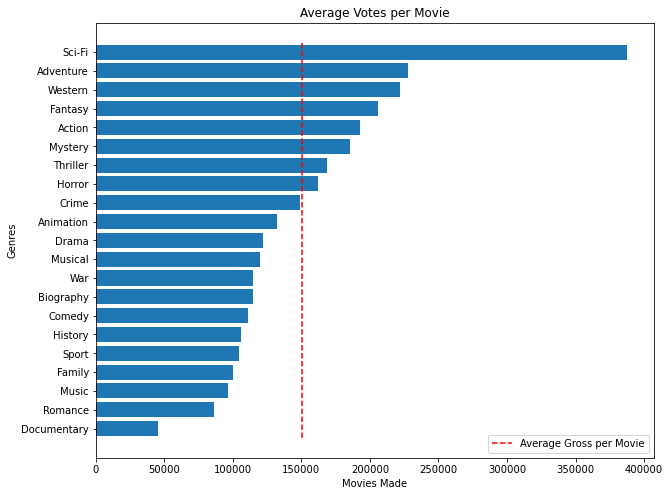

In [59]:
#STEP 3:

#Bar Chart to determine highest Average Votes per Genre

final_df = final_df.sort_values('Average Votes per Movie', ascending = True)

avg_votes = np.mean(final_df['Average Votes per Movie'])

plt.figure(figsize=(10, 8))

plt.barh(final_df['Genres'], final_df['Average Votes per Movie'])

# plotting a line to show the average genre popularity
plt.vlines(x=avg_votes, ymin=-0.5, ymax=20.5, color='red',
           linestyles='dashed', label='Average Gross per Movie')
plt.legend()

plt.title('Average Votes per Movie')
plt.xlabel('Movies Made')
plt.ylabel('Genres')

Text(0, 0.5, 'Genres')

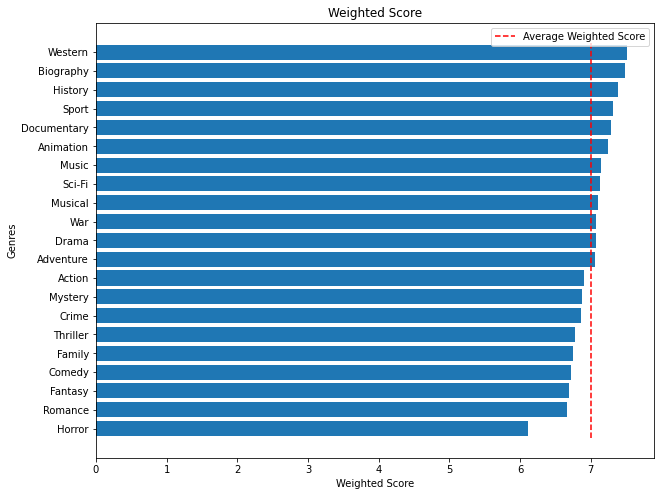

In [58]:
#STEP 4:

#Bar Chart to determine highest weighted score

final_df = final_df.sort_values('Weighted Score', ascending = True)

avg_ws = np.mean(final_df['Weighted Score'])

plt.figure(figsize=(10, 8))

plt.barh(final_df['Genres'], final_df['Weighted Score'])

# plotting a line to show the average genre popularity
plt.vlines(x=avg_ws, ymin=-0.5, ymax=20.5, color='red',
           linestyles='dashed', label='Average Weighted Score')
plt.legend()

plt.title('Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Genres')

In [102]:
#STEP 5:

#Bubble Chart for balanced reccomendation

import plotly.express as px

fig = px.scatter(final_df, x="Average Votes per Movie", y="Weighted Score",
	         size="ADG per Movie", color="Genres",hover_name="Genres", size_max=60,
            title = 'General Assessment')

fig.show()

## Evaluation & Conclusion

Our analysis has reuslted in the following findings:

**1. Which genres generated the highest amount of domestic revenue per movie?**

**Scifi, Animation and Adventure** dominate our per revenue analysis. Each genre averaged over 1 Billion Dollars in domestic gross, more than 2x the average across all Genres. 


**2. Which genres had the highest measurable amount of engagement?**

**Scifi, Adventure, and Western** dominated our per voting/engagement analysis. In particular, Sci-Fi garnered an average 387k votes per movie, a staggering 2.5x the mean votes per genre. Adventure scored impressively as well, garnering ~228k votes, or 1.5x the mean votes per genre.


**3. When an audience does engage, which genres garnered the most positive response?**

**Western, Biography, and History** garnered the highest weighted scores, earning 7.52, 7.48 and 7.39 respectively. However, it is worth noting that the average weighted score for all genres rests at 7.06. This means that even our highest rated genre only scores 7% above the mean. 

Moreover, Genre's that experienced success in the prior 2 metrics such as Scifi, Adventure and Animation all scored above the average (7.13, 7.06, and 7.13 respectively).

An overall analysis of all metrics (displayed in the Bubble Chart above), indicates Sci-Fi, Adventure and Western as clear favorites. However, as Microsoft will be launching a fledgeling studio, it would be best advised to strategically target genres that have not been fully saturated such as Adventure. Our analysis has shown that Animation is chosen as a genre almost half as much on average.

With the results above, this analysis proposes 3 potential routes:

1. Launch a Sci-Fi / Adventure film to compete for large shares of profitable markets off the bat
2. Launch a Sci-Fi / Western and forego potential revenue streams from Adventure
3. Launch a Sci-Fi / Animation Film to optimize for revenue generation and capitalize on an unerserved market

**Analytical Critiques:**

1. In order to round out our analysis, it would be helpful to integrate production cost to determine true profitability per Genre

2. Analysis could be further improved by losing less data during merges by potentially using a fuzzy match loop.
